# 1. Importing Libraries & Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

# 2. Data Preview

In [7]:
df=pd.read_csv('dataset.csv')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### 2.1 Dataset exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

*No null values*

Getting the info for all numerical columns in the dataset

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [11]:
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


# 3. Feature Extraction

*Extracting the year, month, date and weekday from the Date column*

In [12]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [13]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [14]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


In [15]:
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [16]:
df['Weekday'] = pd.to_datetime(df['Date']).dt.strftime('%A')

In [17]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,Friday


# 4. Exploratory Data Analysis (EDA)

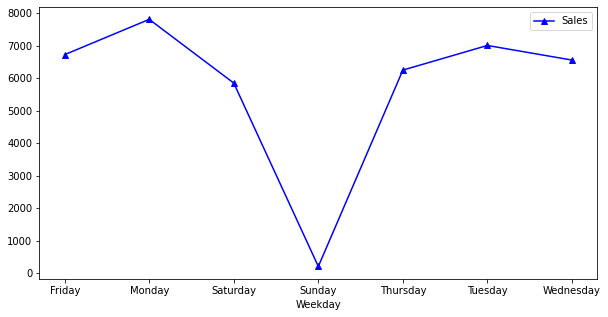

In [21]:
df.groupby('Weekday')[['Sales']].mean().sort_index().plot(figsize=(10,5), marker= '^', color = 'blue');

*4.1 Clearly, the sales drop on Sundays and are maximum on Mondays and Tuesday*

<Axes: xlabel='Year'>

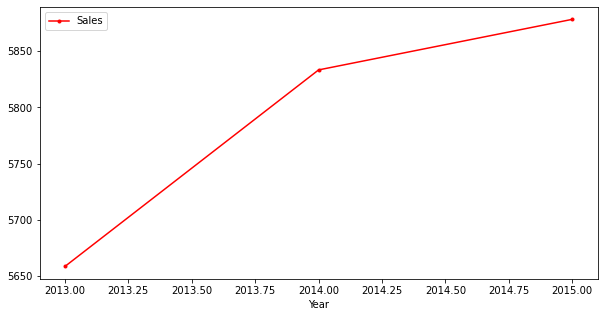

In [14]:
df.groupby('Year')[['Sales']].mean().sort_index().plot(figsize=(10,5), marker = '.', color= 'red')

*4.2 There is a linear trend of increase in the sales from 2013 to 2015*

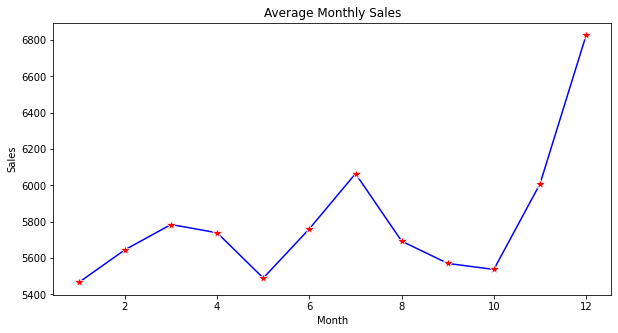

In [15]:
monthly_sales  = df.groupby('Month')[['Sales']].mean()

plt.figure(figsize=(10,5))

sb.lineplot(x= monthly_sales.index, y ='Sales',data = monthly_sales, marker = '*' ,markersize=10, markerfacecolor='red', color='blue')

plt.title('Average Monthly Sales')
plt.show()

*4.3 The average monthly sales suggests that the sales are maximum in December followed by July and November and least in January*

<Axes: ylabel='Frequency'>

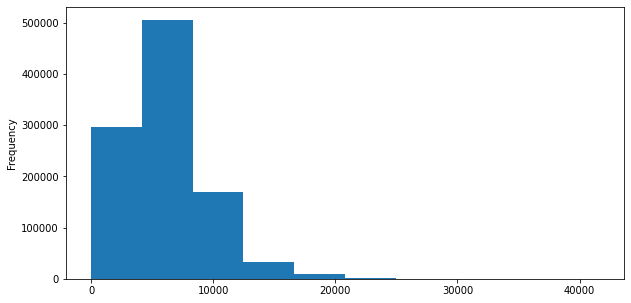

In [16]:
df.Sales.plot(figsize=(10,5), kind = 'hist')

*4.4 Checking the distribution of data in the Sales columns. The above graph suggests the data is skewed. It will be kept in mind during the model training*

<Axes: xlabel='Store'>

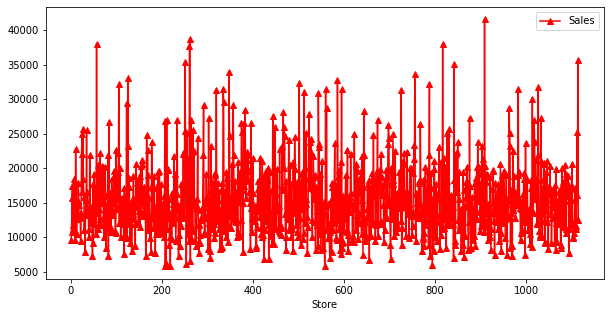

In [17]:
df.groupby('Store')[['Sales']].max().plot(figsize=(10,5), marker = '^', color= 'red')

*4.5 Maximum sales with respect to store. The above graph is showing all the stores. let's filter it out in the next graph to get a clear picture*

<Axes: xlabel='Store', ylabel='Sales'>

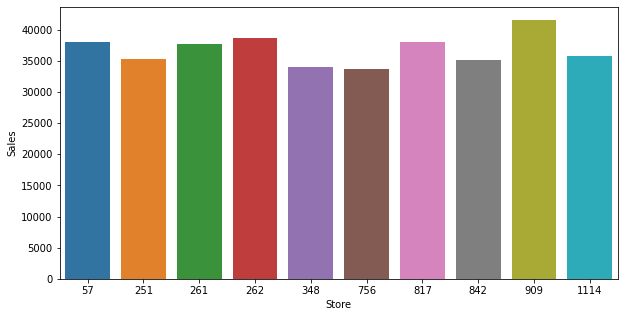

In [18]:
stores_with_max_sales = df.groupby('Store')[['Sales']].max()
top_10_largest_stores = stores_with_max_sales.nlargest(10, 'Sales')

plt.figure(figsize = (10,5))

sb.barplot(x= top_10_largest_stores.index , y = 'Sales', data  = top_10_largest_stores)

*4.6 Top 10 stores having the maximum no. of Sales*

<Axes: xlabel='Store', ylabel='Customers'>

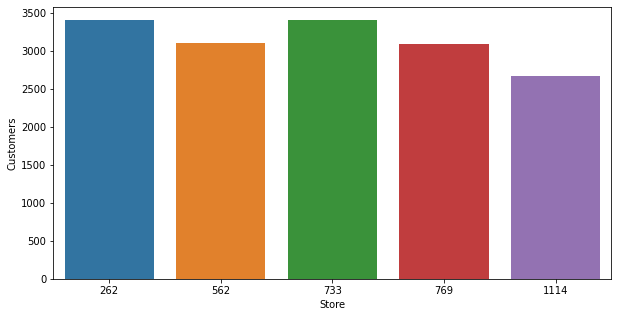

In [19]:
store_customer = df.groupby('Store')[['Customers']].mean()
top_5_largest = store_customer.nlargest(5, 'Customers')

plt.figure(figsize = (10,5))
sb.barplot(x= top_5_largest.index , y = 'Customers', data  = top_5_largest)


*4.6 Top 10 stores having the maximum no. of customers*

In [20]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

<Axes: xlabel='Day', ylabel='Sales'>

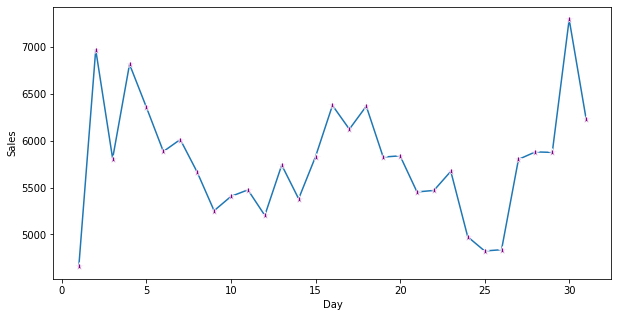

In [21]:
daily_sales = df.groupby('Day')[['Sales']].mean()
plt.figure(figsize = (10,5))
sb.lineplot( x = daily_sales.index , y = 'Sales', data = daily_sales, marker = '*', markersize= 8, markerfacecolor = 'purple')

*4.7 Average Daily Sales*

<Axes: xlabel='Weekday', ylabel='Sales'>

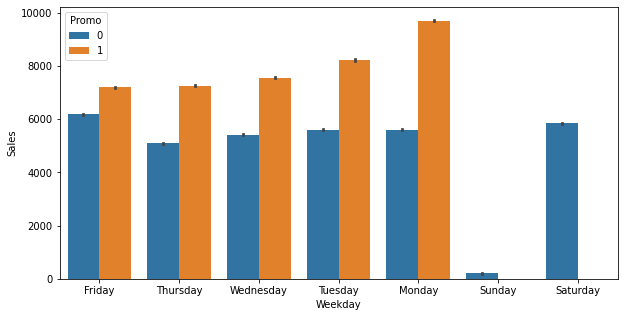

In [22]:
plt.figure(figsize = (10,5))
sb.barplot(x= df['Weekday'] , y = df['Sales'] , data = df, hue= 'Promo')

*4.8 Effect of Promo code on the sales on weekdays*

<Axes: xlabel='Month', ylabel='Customers'>

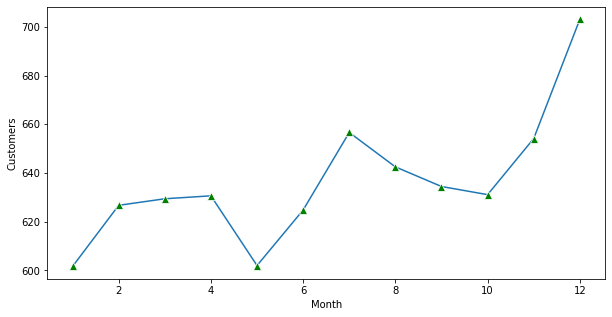

In [23]:
customer_monthly = df.groupby('Month')[['Customers']].mean()
plt.figure(figsize = (10,5))

sb.lineplot(x= customer_monthly.index , y = 'Customers', data  = customer_monthly, marker = '^', markersize = 8, markerfacecolor = 'green')


*4.9 Relation of customers on the basis of month*

# 5. Time-Series Analysis

### 5.1 In Order to do our analysis & forecasting let's first select a store having  maximum no. of average sales.

In [24]:
df.groupby('Store')[['Sales']].mean().nlargest(1,columns = 'Sales')

,Sales
Store,
262,20718.515924


So store no. 262 have the maximum no. of average sales. let's choose this store for further analysis

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,Friday


In [26]:
new_df = df[['Date','Sales','Store']].copy()
new_df.head()

,Date,Sales,Store
0,2015-07-31,5263,1
1,2015-07-31,6064,2
2,2015-07-31,8314,3
3,2015-07-31,13995,4
4,2015-07-31,4822,5


In [27]:
new_df= new_df[new_df['Store']==262].loc[:,:]

In [28]:
new_df.head()

,Date,Sales,Store
261,2015-07-31,25774,262
1376,2015-07-30,22253,262
2491,2015-07-29,21041,262
3606,2015-07-28,22442,262
4721,2015-07-27,22185,262


In [29]:
new_df.shape

(942, 3)

##5.2 In Order to use prophet , we want the dataframe in a specific format

In [30]:
prophet_df= new_df[['Date','Sales']].copy()

In [31]:
# Rename the columns to 'ds' and 'y'
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Sales': 'y'})

Let's sort the dataframe by date time stamp

In [32]:
prophet_df.sort_values('ds',inplace= True)
prophet_df.head()

,ds,y
1016356,2013-01-01,17267
1015241,2013-01-02,16964
1014126,2013-01-03,16616
1013011,2013-01-04,16849
1011896,2013-01-05,14868


## 5.3 Inititating an instance of the model

In [33]:
model = Prophet()

In [34]:
model.fit(prophet_df)

12:25:24 - cmdstanpy - INFO - Chain [1] start processing
12:25:25 - cmdstanpy - INFO - Chain [1] done processing


As our model is now trained on the dataset, let's prepare some new dates for forecasting our trained model's predictions.
Prophet has the functionality to generate future datestamps as a dataframe. Further this dataframe will be used to predict the sales by our trained model

In [35]:
new_df = model.make_future_dataframe(periods = 42 , freq = 'W')

In [36]:
new_df.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [37]:
new_df.shape

(984, 1)

Therefore, 42 weeks of date stamps is ready in a dateframe to be fed to the trained model.

## 5.4 Predictions and Outcomes

In [38]:
forecast = model.predict(new_df)


In [39]:
forecast[['ds','yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2013-01-01,15496.670043,22604.573775,18979.235904
1,2013-01-02,15035.282009,22258.568602,18487.892313
2,2013-01-03,15445.904010,22506.348625,19103.413565
3,2013-01-04,16634.419354,23950.523917,20281.288929
4,2013-01-05,12810.320147,19705.781615,16254.423176
...,...,...,...,...
979,2016-04-17,25427.500413,33422.618692,29554.945723
980,2016-04-24,26048.937438,33378.539410,29665.271918
981,2016-05-01,26437.422289,33962.571474,30265.104945
982,2016-05-08,27244.311965,34659.574492,30901.256380


There are 4 outputs that are important to explain. These outputs are:

ds: the datestamp of the forecasted value

yhat: the forecasted value of our metric

yhat_lower: the lower bound of our forecasts

yhat_upper: the upper bound of our forecasts

Prophet provides a plot function to show the results quickly

# 6. Plotting the forecast




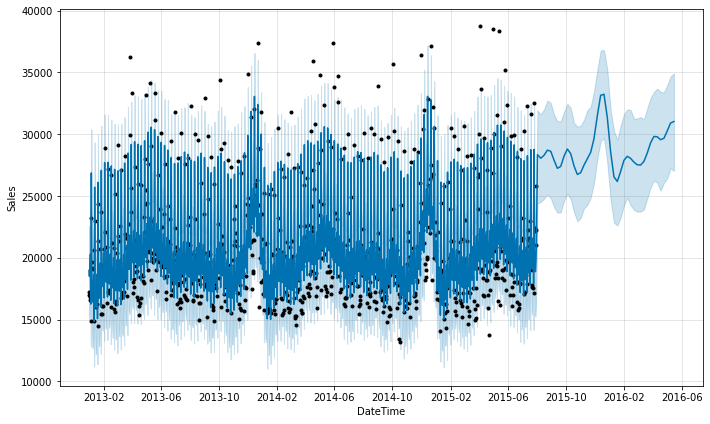

In [40]:
fig1= model.plot(forecast, xlabel = 'DateTime', ylabel ='Sales', uncertainty = True)

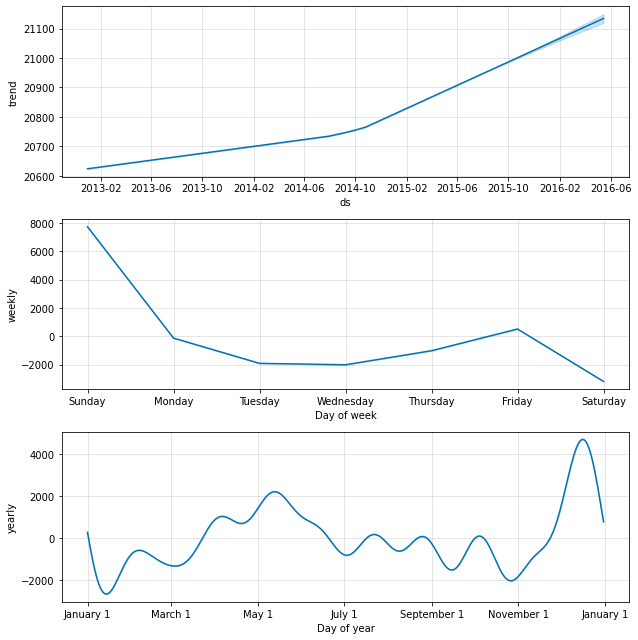

In [41]:
fig2=model.plot_components(forecast)

ın above, two figures shows the observed values of our sales price prediction (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the light blue shaded regions).

Prophet library provides to return the components of our forecasts.

This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values.

# 7. Incorporating Holidays

Since we have holidays too in our dataset, we need to incorporate those days too as they reflect the sales as well as forecasting.

In [42]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,Friday


In [43]:
df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [44]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Creating another dataframe for holidays only with respect to the date

In [45]:
# create holidays dataframe
#Three different holidays are avaiable in State Holiday
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))
holidays.head(5)

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


Now as our holiday dataframe is ready consisting all state and school holidays combined, we can feed this data into the prophet model to make forecast accordingly.

In [46]:
model = Prophet(interval_width = 0.95, holidays = holidays)
model.fit(prophet_df)

12:25:48 - cmdstanpy - INFO - Chain [1] start processing
12:25:48 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# dataframe that extends into future 6 weeks
future_dates = model.make_future_dataframe(periods = 42, freq ='W')

print("First week to forecast.")
future_dates.head()

First week to forecast.


,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [48]:
future_dates.shape

(984, 1)

As the future dates are created, we can now pass these dates to the trained model for performing predictions

In [49]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
979,2016-04-17,29521.613658,24391.290553,34670.873413
980,2016-04-24,29522.727861,24415.576511,35280.547903
981,2016-05-01,30077.945901,24249.565096,35350.374397
982,2016-05-08,30685.694507,25493.407885,35853.648040
983,2016-05-15,30712.329597,25436.762167,36241.465253


Prophet provides a plot function to show the results quickly

<Figure size 1080x360 with 0 Axes>

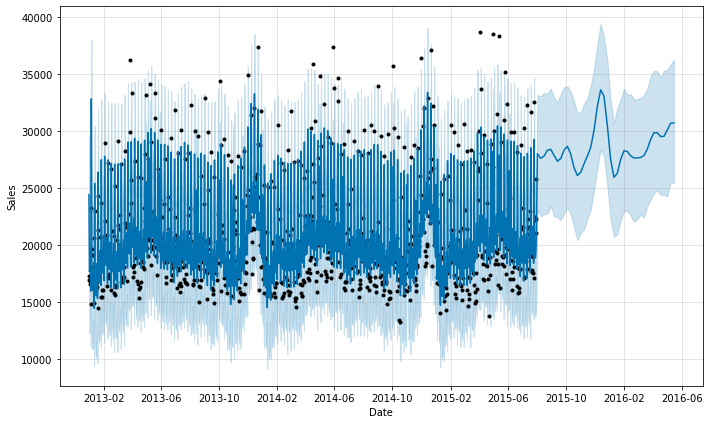

In [50]:
plt.figure(figsize = (15,5))
fig = model.plot(forecast,xlabel ='Date',ylabel= 'Sales',uncertainty = True)

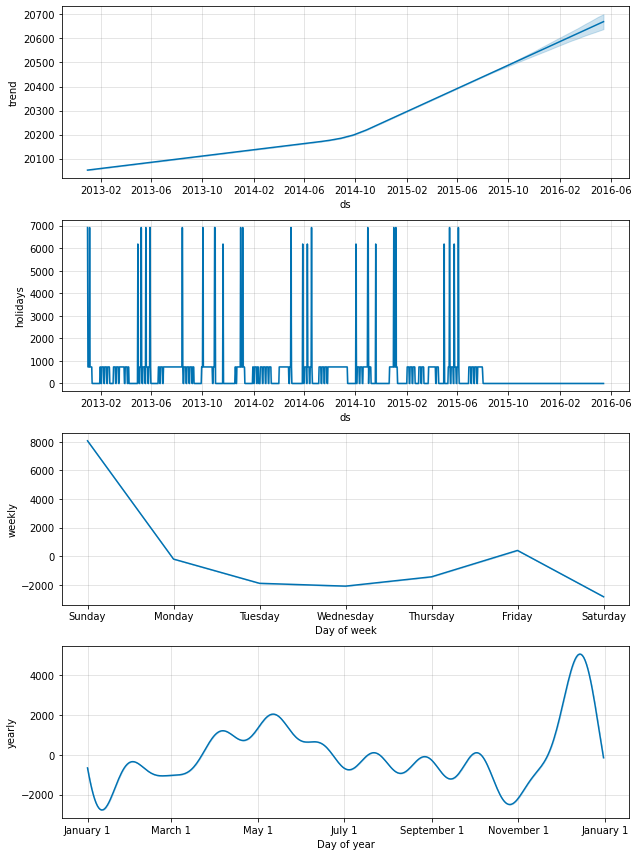

In [51]:
fig2=model.plot_components(forecast)